<a href="https://colab.research.google.com/github/Wickramasingh/Research-MA_Project/blob/main/youtube_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

2.Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = 'Top Youtubers Dataset.csv'
df = pd.read_csv(file_path, encoding='latin1')

df.head()

,Rank,Youtuber,Subscribers,Video Views,Video Count,Category,Started
0,1,MrBeast,284000000,5.240290e+10,803,Entertainment,2012
1,2,T-Series,268000000,2.586240e+11,21237,Music,2006
2,3,YouTube Movies,181000000,0.000000e+00,0,Film & Animation,2015
3,4,Cocomelon - Nursery Rhymes,177000000,1.828810e+11,1188,Education,2006
4,5,SET India,174000000,1.653950e+11,139720,Shows,2006


3.Data Cleaning and Preprocessing

In [4]:
# Remove any duplicate rows
df = df.drop_duplicates()
# Remove rows missing values
df = df.dropna(subset=['Category', 'Subscribers', 'Video Views', 'Video Count', 'Started'])
# Convert 'Started' column to numeric if it's not already
df['Started'] = pd.to_numeric(df['Started'], errors='coerce')
# Drop rows where 'Started' could not be converted to numeric
df = df.dropna(subset=['Started'])
# Ensure 'Subscribers' is numeric
df['Subscribers'] = pd.to_numeric(df['Subscribers'], errors='coerce')
# Drop rows where 'Subscribers' could not be converted to numeric
df = df.dropna(subset=['Subscribers'])
# Drop rows where 'Video Views' or 'Video Count' are not numeric or have missing values
df['Video Views'] = pd.to_numeric(df['Video Views'], errors='coerce')
df['Video Count'] = pd.to_numeric(df['Video Count'], errors='coerce')
df = df.dropna(subset=['Video Views', 'Video Count'])
df = df[(df['Subscribers'] != 0) & (df['Video Views'] != 0) & (df['Video Count'] != 0)]

df.head()


,Rank,Youtuber,Subscribers,Video Views,Video Count,Category,Started
0,1,MrBeast,284000000,5.240290e+10,803,Entertainment,2012
1,2,T-Series,268000000,2.586240e+11,21237,Music,2006
3,4,Cocomelon - Nursery Rhymes,177000000,1.828810e+11,1188,Education,2006
4,5,SET India,174000000,1.653950e+11,139720,Shows,2006
5,6,? Kids Diana Show,123000000,1.039730e+11,1230,People & Blogs,2015


Linear Regression model

In [5]:
X = df[['Video Views', 'Video Count','Started', 'Category']]
y = df['Subscribers']

4.Model Training

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Category'])
    ],
    remainder='passthrough'
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5.Model Evaluation

In [15]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression model - Mean Absolute Error: {mae}")
print(f"Linear Regression model - Mean Squared Error (MSE): {mse}")
print(f"Linear Regression model - R-squared: {r2}")
print(f"Linear Regression model - Root Mean Squared Error (RMSE): {rmse}")

Linear Regression model - Mean Absolute Error: 6112739.026828133
Linear Regression model - Mean Squared Error (MSE): 67902380871804.77
Linear Regression model - R-squared: 0.4337485563575084
Linear Regression model - Root Mean Squared Error (RMSE): 8240290.096337918


6.Visualization

In [10]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred
})
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred,
    'Category': X_test_with_names['Category']
})
comparison_df.head(10)

,Channel Name,Category,Actual Subscribers,Predicted Subscribers
359,Amit Bhadana,Entertainment,24400000,1.597022e+07
905,Airrack,Entertainment,15200000,1.643727e+07
548,GRAMMY GOLD OFFICIAL,Music,19800000,3.475896e+07
571,AMARINTV : ????????????,Entertainment,19400000,1.994734e+07
717,CRAZY GREAPA,Entertainment,17100000,2.690707e+07
142,BabyBus - Kids Songs and Cartoons,Education,36800000,4.111168e+07
222,Karla Bustillos,Entertainment,31200000,2.127702e+07
176,Dangal TV Channel,Entertainment,34100000,3.590365e+07
91,Like Nastya Show,Entertainment,43300000,3.317652e+07
294,Smosh,Comedy,26600000,2.392500e+07


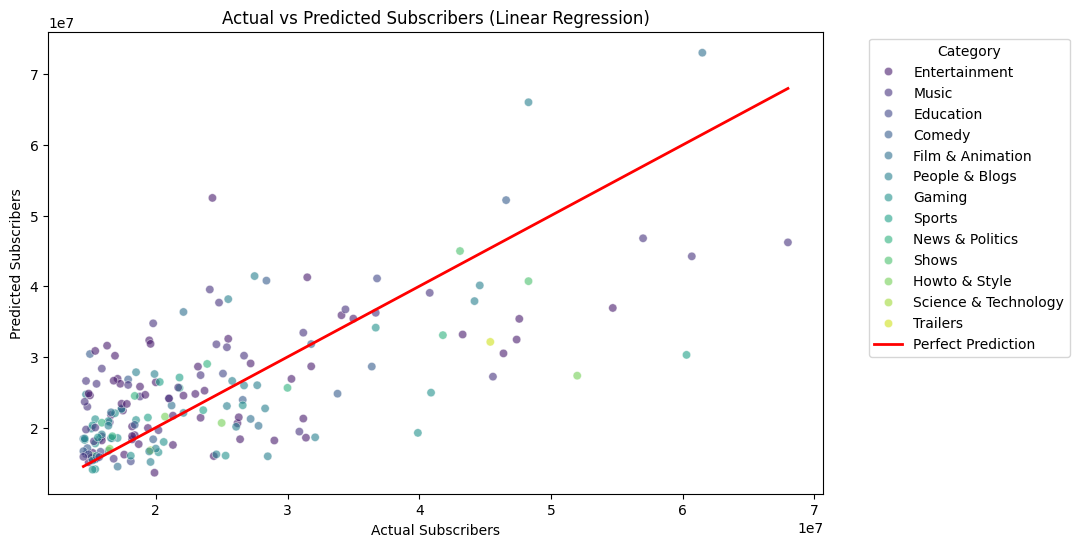

In [11]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred
})
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred,
    'Category': X_test_with_names['Category']
})

#scatter plot with color-coded categories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Subscribers', y='Predicted Subscribers', hue='Category', data=plot_df, alpha=0.6, palette='viridis')

#prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Subscribers (Linear Regression)', fontsize=12)
plt.xlabel('Actual Subscribers', fontsize=10)
plt.ylabel('Predicted Subscribers', fontsize=10)

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Random Forest model

7.Model Training

In [16]:
# model using RandomForestRegressor
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
# Train the new model
random_forest_model.fit(X_train, y_train)

# Predict using the new model
y_pred_rf = random_forest_model.predict(X_test)


8. Model Evaluation

In [17]:
# performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Absolute Error:: {mae_rf}')
print(f'Random Forest - R-squared: {r2_rf}')


Random Forest - Mean Absolute Error:: 6251114.583333333
Random Forest - R-squared: 0.30161115453058795


9. Visualization

In [18]:
X_test_with_names = X_test.copy()
X_test_with_names['Youtuber'] = df.loc[X_test.index, 'Youtuber']
X_test_with_names['Category'] = df.loc[X_test.index, 'Category']

comparison_df = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_rf
})
comparison_df.head(10)
plot_df = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_rf,
    'Category': X_test_with_names['Category']
})
comparison_df.head(10)

,Channel Name,Category,Actual Subscribers,Predicted Subscribers
359,Amit Bhadana,Entertainment,24400000,17283000.0
905,Airrack,Entertainment,15200000,19351000.0
548,GRAMMY GOLD OFFICIAL,Music,19800000,29595000.0
571,AMARINTV : ????????????,Entertainment,19400000,19361000.0
717,CRAZY GREAPA,Entertainment,17100000,25330000.0
142,BabyBus - Kids Songs and Cartoons,Education,36800000,41481000.0
222,Karla Bustillos,Entertainment,31200000,23440000.0
176,Dangal TV Channel,Entertainment,34100000,33009000.0
91,Like Nastya Show,Entertainment,43300000,36229000.0
294,Smosh,Comedy,26600000,22783000.0


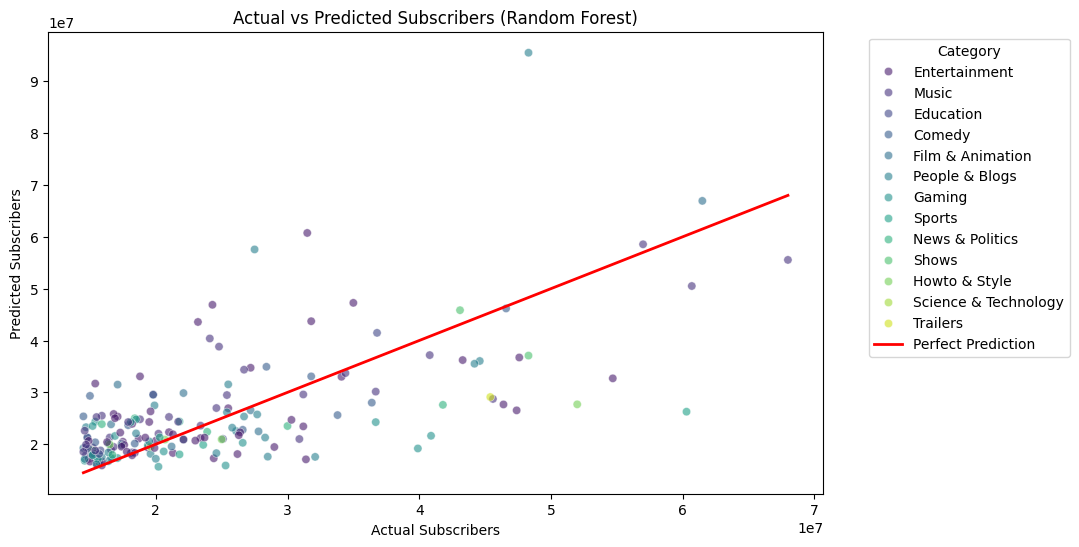

In [19]:
#DataFrame for the Random Forest model
comparison_df_rf = pd.DataFrame({
    'Channel Name': X_test_with_names['Youtuber'],
    'Category': X_test_with_names['Category'],
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_rf
})

# Scatter plot for Random Forest
plot_df_rf = pd.DataFrame({
    'Actual Subscribers': y_test,
    'Predicted Subscribers': y_pred_rf,
    'Category': X_test_with_names['Category']
})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Subscribers', y='Predicted Subscribers', hue='Category', data=plot_df_rf, alpha=0.6, palette='viridis')

# Prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Subscribers (Random Forest)', fontsize=12)
plt.xlabel('Actual Subscribers', fontsize=10)
plt.ylabel('Predicted Subscribers', fontsize=10)

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [20]:
print(f"Linear Regression model - Mean Absolute Error: {mae}")
print(f"Linear Regression model - R-squared: {r2}")
print(f"Random Forest - Mean Absolute Error: {mae_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

Linear Regression model - Mean Absolute Error: 6251114.583333333
Linear Regression model - R-squared: 0.30161115453058795
Random Forest - Mean Absolute Error: 6251114.583333333
Random Forest - R-squared: 0.30161115453058795


10.Model Comparison - RMSE

In [27]:
models = ['Linear Regression',' Random Forest']
rmse = [
    np.sqrt(mean_squared_error(y_test, y_pred)),
    np.sqrt(mean_squared_error(y_test, y_pred_rf))
]

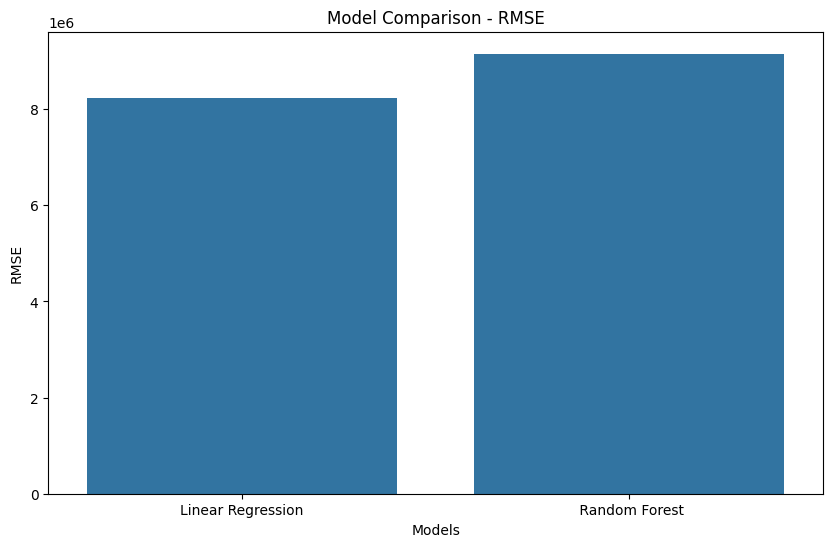

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse)
plt.title('Model Comparison - RMSE')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

11.Model Comparison - R2 Score

In [25]:
r2 = [
    r2_score(y_test, y_pred),
    r2_score(y_test, y_pred_rf)
]

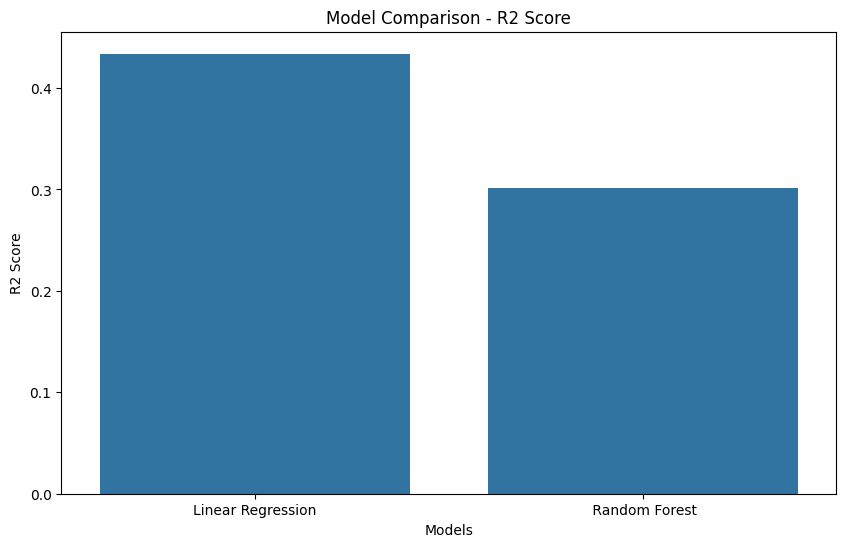

In [26]:
# Plotting R2 Score
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2)
plt.title('Model Comparison - R2 Score')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.show()